# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
# import libraries here
import pandas as pd
import numpy as np

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [2]:
# your answer here
temp = pd.read_csv("Temp_States.csv")

temp.columns=[e.lower().replace(" ", "_")for e in temp.columns]


#### Print `temp`

In [3]:
print(temp)

         city        state  temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [4]:
# your answer here
temp.info(memory_usage="deep")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   city         7 non-null      object 
 1   state        7 non-null      object 
 2   temperature  7 non-null      float64
dtypes: float64(1), object(2)
memory usage: 1.1 KB


In [5]:
temp.shape

(7, 3)

In [6]:
temp.head(7)

,city,state,temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Select the rows where state is New York

In [7]:
# your answer here
new_york = temp.loc[temp["state"]=="New York"]
new_york

,city,state,temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [8]:
# your answer here
new_york["temperature"].mean


<bound method NDFrame._add_numeric_operations.<locals>.mean of 0    19.444444
1     9.444444
2     3.333333
Name: temperature, dtype: float64>

#### We want to know cities and states with Temperature above 15 degress Celcius

In [9]:
# your answer here
temp.loc[temp["temperature"] < 15]

,city,state,temperature
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
4,Bridgeport,Connecticut,14.444444


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [10]:
# your answer here
temp.loc[temp["temperature"]<15, ["city","temperature"]]


,city,temperature
1,Albany,9.444444
2,Buffalo,3.333333
4,Bridgeport,14.444444


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [11]:
# your answer here
temp.loc[(temp["temperature"] > 15) & (temp["temperature"]< 20), ["city", "temperature"]]

,city,temperature
0,NYC,19.444444
3,Hartford,17.222222


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [12]:
# your answer here
mean_std_states = temp.groupby("state").agg("mean","std")
mean_std_states


,temperature
state,
Connecticut,15.833333
New Jersey,21.111111
New York,10.740741


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [13]:
# your answer here
employee = pd.read_csv("employee.csv")

employee.columns = [e.lower().replace(" ", "_") for e in employee.columns]

#### Explore the data types of the Temp dataframe. Comment your results

In [14]:
# your answer here
employee.info(memory_usage="deep")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        9 non-null      object
 1   department  9 non-null      object
 2   education   9 non-null      object
 3   gender      9 non-null      object
 4   title       9 non-null      object
 5   years       9 non-null      int64 
 6   salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 3.0 KB


In [15]:
employee.shape

(9, 7)

In [16]:
employee.head()

,name,department,education,gender,title,years,salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

In [17]:
# importamos librería para visualizar datos
import matplotlib.pyplot as plt

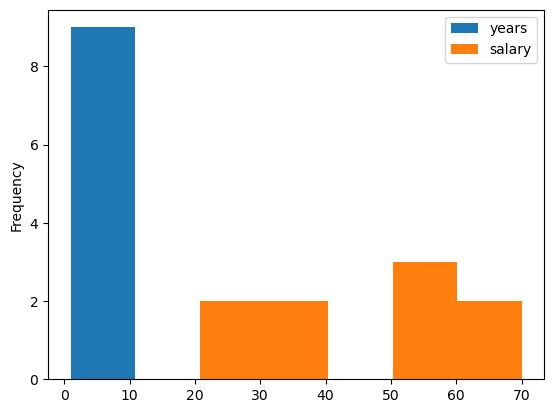

In [18]:
employee.plot.hist(bins= 7);
 # bins=nº de barras

#### What's the average salary in this company?

In [19]:
# your answer here
average = employee["salary"].mean()
average

48.888888888888886

#### What's the highest salary?

In [20]:
# your answer here
max = employee["salary"].max()
max

70

#### What's the lowest salary?

In [21]:
# your answer here
min = employee["salary"].min()
min

30

#### Who are the employees with the lowest salary?

In [22]:
# your answer here
employee.loc[employee["salary"] < average]

,name,department,education,gender,title,years,salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35


#### Could you give all the information about an employee called David?

In [23]:
# your answer here
david = employee.loc[employee["name"] == "David"]
david


,name,department,education,gender,title,years,salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [24]:
# your answer here
david["salary"]


2    30
Name: salary, dtype: int64

#### Print all the rows where job title is associate

In [25]:
# your answer here
employee.loc[employee["title"] == "associate"]

,name,department,education,gender,title,years,salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [26]:
# your answer here- 1 method
employee.head(3)


,name,department,education,gender,title,years,salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [27]:
# your answer here- 2nd method
employee[:3]


,name,department,education,gender,title,years,salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [28]:
# your answer here
employee.loc[employee["salary"] < 55]


,name,department,education,gender,title,years,salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [29]:
# your answer here
employee.groupby('years').agg("mean")

,salary
years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


####  What is the average Salary per title?

In [30]:
# your answer here
employee.groupby('title').agg("mean")

,years,salary
title,,
VP,8.00,70.000000
analyst,2.25,32.500000
associate,4.00,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

<AxesSubplot:>

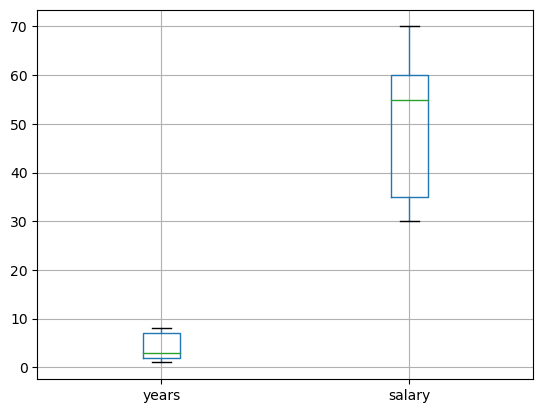

In [31]:
# draw boxplot here
import seaborn as sns
employee.boxplot()

In [32]:
# print first quartile here
q1 = np.percentile(employee["salary"], 25)
q1

35.0

In [33]:
# print third quartile here
q3 = np.percentile(employee["salary"], 75)
q3

60.0

#### Is the mean salary per gender different?

In [34]:
# your answer here
employee.groupby("gender").agg("mean")

,years,salary
gender,,
F,4.0,47.5
M,4.2,50.0


In [35]:
employee.head()

,name,department,education,gender,title,years,salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [36]:
# your answer here
por_department = employee.groupby("department").agg({"mean", "max", "min"})
por_department

C:\Users\GAMM\AppData\Local\Temp\ipykernel_3256\1933099115.py:2: FutureWarning: ['name', 'education', 'gender', 'title'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  por_department = employee.groupby("department").agg({"mean", "max", "min"})


years               salary           
             max min      mean    max min   mean
department                                      
HR             8   2  4.666667     70  30  45.00
IT             8   1  4.500000     70  30  48.75
Sales          3   2  2.500000     55  55  55.00

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [37]:
# your answer here

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [38]:
# your answer here
orders = pd.read_csv('Orders.csv')

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [39]:
# your answer here
orders.info(memory_usage="deep")
orders.columns = [e.lower().replace(" ", "_") for e in orders.columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    397924 non-null  int64  
 1   InvoiceNo     397924 non-null  int64  
 2   StockCode     397924 non-null  object 
 3   year          397924 non-null  int64  
 4   month         397924 non-null  int64  
 5   day           397924 non-null  int64  
 6   hour          397924 non-null  int64  
 7   Description   397924 non-null  object 
 8   Quantity      397924 non-null  int64  
 9   InvoiceDate   397924 non-null  object 
 10  UnitPrice     397924 non-null  float64
 11  CustomerID    397924 non-null  int64  
 12  Country       397924 non-null  object 
 13  amount_spent  397924 non-null  float64
dtypes: float64(2), int64(8), object(4)
memory usage: 141.2 MB


In [40]:
orders.shape

(397924, 14)

In [41]:
# your answer here
orders.describe().T

,count,mean,std,min,25%,50%,75%,max
unnamed:_0,397924.0,278465.221859,152771.368303,0.0,148333.75,284907.50,410079.25,541908.00
invoiceno,397924.0,560617.126645,13106.167695,536365.0,549234.00,561893.00,572090.00,581587.00
year,397924.0,2010.934259,0.247829,2010.0,2011.00,2011.00,2011.00,2011.00
month,397924.0,7.612537,3.416527,1.0,5.00,8.00,11.00,12.00
day,397924.0,3.614555,1.928274,1.0,2.00,3.00,5.00,7.00
hour,397924.0,12.728247,2.273535,6.0,11.00,13.00,14.00,20.00
quantity,397924.0,13.021823,180.420210,1.0,2.00,6.00,12.00,80995.00
unitprice,397924.0,3.116174,22.096788,0.0,1.25,1.95,3.75,8142.75
customerid,397924.0,15294.315171,1713.169877,12346.0,13969.00,15159.00,16795.00,18287.00
amount_spent,397924.0,22.394749,309.055588,0.0,4.68,11.80,19.80,168469.60


In [42]:
orders.head()

,unnamed:_0,invoiceno,stockcode,year,month,day,hour,description,quantity,invoicedate,unitprice,customerid,country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


####  What is the average Purchase Price?

In [43]:
# your answer here
orders["amount_spent"].mean()

22.39474850474768

#### What were the highest and lowest purchase prices? 

In [44]:
#utilizamos el idx para que nos dé el índice
purchase_max = orders.loc[orders["amount_spent"].idxmax()]
purchase_min = orders.loc[orders["amount_spent"].idxmin()]

In [45]:
purchase_max

unnamed:_0                           540421
invoiceno                            581483
stockcode                             23843
year                                   2011
month                                    12
day                                       5
hour                                      9
description     paper craft , little birdie
quantity                              80995
invoicedate             2011-12-09 09:15:00
unitprice                              2.08
customerid                            16446
country                      United Kingdom
amount_spent                       168469.6
Name: 397451, dtype: object

In [46]:
# your answer here
purchase_min

unnamed:_0                              9302
invoiceno                             537197
stockcode                              22841
year                                    2010
month                                     12
day                                        7
hour                                      14
description     round cake tin vintage green
quantity                                   1
invoicedate              2010-12-05 14:02:00
unitprice                                0.0
customerid                             12647
country                              Germany
amount_spent                             0.0
Name: 6914, dtype: object

#### Select all the customers we have in Spain

In [47]:
# your answer here
spain = orders.loc[orders["country"] == "Spain"]
spain.head()

,unnamed:_0,invoiceno,stockcode,year,month,day,hour,description,quantity,invoicedate,unitprice,customerid,country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.0
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0


In [48]:
spain.shape

(2485, 14)

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [49]:
customers_in_spain = orders["country"].value_counts()["Spain"]
print("Número de clientes en España:", customers_in_spain)


Número de clientes en España: 2485


In [50]:
customers_in_spain = len(spain.value_counts("customerid"))
print("Número de clientes en España:", customers_in_spain)


Número de clientes en España: 30


#### Select all the customers who have bought more than 50 items ?

In [51]:
# your answer here
more_50 = orders.loc[orders["quantity"] > 50]
more_50.head()

,unnamed:_0,invoiceno,stockcode,year,month,day,hour,description,quantity,invoicedate,unitprice,customerid,country,amount_spent
46,46,536371,22086,2010,12,3,9,paper chain kit 50's christmas,80,2010-12-01 09:00:00,2.55,13748,United Kingdom,204.00
83,83,536376,21733,2010,12,3,9,red hanging heart t-light holder,64,2010-12-01 09:32:00,2.55,15291,United Kingdom,163.20
96,96,536378,21212,2010,12,3,9,pack of 72 retrospot cake cases,120,2010-12-01 09:37:00,0.42,14688,United Kingdom,50.40
102,102,536378,85071B,2010,12,3,9,red charlie+lola personal doorsign,96,2010-12-01 09:37:00,0.38,14688,United Kingdom,36.48
174,176,536386,85099C,2010,12,3,9,jumbo bag baroque black white,100,2010-12-01 09:57:00,1.65,16029,United Kingdom,165.00


#### Select orders from Spain that are above 50 items

In [52]:
# your answer here
spain_more_50 = spain.loc[spain["quantity"] > 50]
spain_more_50.head()

,unnamed:_0,invoiceno,stockcode,year,month,day,hour,description,quantity,invoicedate,unitprice,customerid,country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.0
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0


#### Select all free orders

In [53]:
# your answer here
free_order = orders.loc[orders["amount_spent"] == 0]
free_order.head()

,unnamed:_0,invoiceno,stockcode,year,month,day,hour,description,quantity,invoicedate,unitprice,customerid,country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [54]:
lunch_bag_orders = orders.loc[orders["description"].str.contains("lunch bag")]
lunch_bag_orders.head()

,unnamed:_0,invoiceno,stockcode,year,month,day,hour,description,quantity,invoicedate,unitprice,customerid,country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [55]:
# your answer here
lunch_bag_orders_2011 = lunch_bag_orders.loc[lunch_bag_orders["year"] == 2011]
lunch_bag_orders_2011.head()

,unnamed:_0,invoiceno,stockcode,year,month,day,hour,description,quantity,invoicedate,unitprice,customerid,country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65


#### Show the frequency distribution of the amount spent in Spain.

In [56]:
spain_orders = orders[orders["country"] == "Spain"]
amount_spent_distribution = spain_orders["amount_spent"].value_counts()
print(amount_spent_distribution)


15.00     186
17.70     122
19.80      99
17.40      86
10.20      76
         ... 
3.36        1
8.67        1
5.85        1
27.00       1
109.50      1
Name: amount_spent, Length: 316, dtype: int64


In [57]:
# your answer here
spain["amount_spent"].value_counts()

15.00     186
17.70     122
19.80      99
17.40      86
10.20      76
         ... 
3.36        1
8.67        1
5.85        1
27.00       1
109.50      1
Name: amount_spent, Length: 316, dtype: int64

#### Select all orders made in the month of August

In [58]:
# your answer here
august_orders = orders.loc[orders["month"] == 8]
august_orders.head()

,unnamed:_0,invoiceno,stockcode,year,month,day,hour,description,quantity,invoicedate,unitprice,customerid,country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [59]:
# your answer here
august_orders.value_counts("country")

country
United Kingdom     23105
Germany              795
EIRE                 593
France               569
Netherlands          280
Switzerland          267
Spain                252
Belgium              194
Israel               171
Channel Islands      140
Australia            107
Italy                 95
Austria               88
Norway                77
Finland               61
Malta                 55
Portugal              41
Sweden                40
Unspecified           23
Iceland               22
Poland                17
Denmark               16
Canada                 5
dtype: int64

#### What's the  average amount of money spent by country

In [ ]:
average_spent_by_country = orders.groupby("country")["amount_spent"].mean()
print(average_spent_by_country)


In [74]:
# your answer here
average_spent_by_country = orders.groupby("country")["amount_spent"].mean()
average_spent_by_country.head()

country
Australia    116.895620
Austria       25.624824
Bahrain       32.258824
Belgium       20.283772
Brazil        35.737500
Name: amount_spent, dtype: float64

#### What's the most expensive item?

In [71]:
# your answer here
orders.loc[orders["unitprice"].idxmax()]

unnamed:_0                   173382
invoiceno                    551697
stockcode                      POST
year                           2011
month                             5
day                               2
hour                             13
description                 postage
quantity                          1
invoicedate     2011-05-03 13:46:00
unitprice                   8142.75
customerid                    16029
country              United Kingdom
amount_spent                8142.75
Name: 118352, dtype: object

#### What was the average amount spent per year ?

In [76]:
# your answer here
average_spent_by_year = orders.groupby("year")["amount_spent"].mean()
average_spent_by_year.head()

year
2010    21.892733
2011    22.430074
Name: amount_spent, dtype: float64